In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from plotly import graph_objs as go
from plotly.offline import iplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [29]:
df= pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Exploring Data


In [ ]:
print("Initial rows in in dataset:")
df.head()

In [3]:
# Get the dimensions of the Dataset
print("Dimensions of the Dataset (Rows, Columns):")
df.shape

Dimensions of the Dataset (Rows, Columns):


(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
print("Statistical summary of numeric features:")
df.describe()

Statistical summary of numeric features:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
print("Statistical summary of categorical features:")
df.describe(include=object)

Statistical summary of categorical features:


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [8]:
# Removing any leading, and trailing whitespaces in columns
df.columns = df.columns.str.strip()

In [9]:
df.columns.tolist()

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [10]:
# Check nulls
null = df.isna().sum()
total = len(df)
percentage = (null / total) * 100
print(percentage[percentage != 0])
print(f"The percentage of nulls in each column:\n{percentage}")

Series([], dtype: float64)
The percentage of nulls in each column:
Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64


# Preprocessing

In [30]:
df['RestingBP'].replace(0, np.nan, inplace=True)
df['Cholesterol'].replace(0, np.nan, inplace=True)

<ipython-input-30-f401bef52cca>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-30-f401bef52cca>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [20]:
# Check nulls
null = df.isna().sum()
total = len(df)
percentage = (null / total) * 100
print(percentage[percentage != 0])
print(f"The percentage of nulls in each column:\n{percentage}")

RestingBP       0.108932
Cholesterol    18.736383
dtype: float64
The percentage of nulls in each column:
Age                0.000000
Sex                0.000000
ChestPainType      0.000000
RestingBP          0.108932
Cholesterol       18.736383
FastingBS          0.000000
RestingECG         0.000000
MaxHR              0.000000
ExerciseAngina     0.000000
Oldpeak            0.000000
ST_Slope           0.000000
HeartDisease       0.000000
dtype: float64


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer

# Use KNN imputation
imputer = KNNImputer(n_neighbors=5)
df[['RestingBP', 'Cholesterol']] = imputer.fit_transform(df[['RestingBP', 'Cholesterol']])

In [ ]:
# A function to the visualization of numeric & categorical features with the target feature
def num_features(df, num_var, tar_var):
    x0 = df[df[tar_var]==0][num_var]
    x1 = df[df[tar_var]==1][num_var]

    trace1 = go.Histogram(x = x0,
                               name = "No",
                               opacity = 0.75,
                               marker=dict(color="#0A4D68",
                                           line = dict(color = '#DBE6EC',
                                                       width = 1)))

    trace2 = go.Histogram(x = x1,
                               name = "Yes",
                               opacity = 0.75,
                               marker=dict(color="#A6D0DD",
                                           line = dict(color = '#DBE6EC',
                                                       width = 1)))

    data = [trace1, trace2]

    layout = go.Layout(title={'text': num_var,
                         'y':0.9,
                         'x':0.5,
                         'xanchor':'center',
                         'yanchor':'top'},
                         barmode='overlay',
                         yaxis=dict(title='Count'),
                         template = 'plotly_dark')

    fig = go.Figure(data=data, layout=layout)

    iplot(fig)

In [ ]:
df['HeartDisease'].value_counts()

In [ ]:
df['Cholesterol'].value_counts()

In [ ]:
for i in df.describe().columns:
  num_features(df, i, "HeartDisease")

In [22]:
# Separating Numeric and Categorical Columns
numeric_col = [col for col in df.columns if df[col].dtype != 'object']
categorical_col = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
# Visualize Categorical features
for feature in categorical_col:
    num_features(df, feature, "HeartDisease")
    print("\n {}".format(df[feature].value_counts()))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Outliers by boxplots
for col in numeric_col:
   plt.figure(figsize=(8, 6))
   sns.boxplot(data= df[col])
   plt.title(f'{col} Box plot')
   #plt.show()

In [ ]:
corr_matrix = df[numeric_col].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [32]:
le = LabelEncoder()
for column in df.select_dtypes(include=['object']):
    df[column] = le.fit_transform(df[column])

In [33]:
X=df.drop(['HeartDisease'],axis=1)
Y=df["HeartDisease"] # Target

print(f"the shape of the inputs x is: {X.shape}")
print(f"the shape of the targets y is: {Y.shape}")

the shape of the inputs x is: (918, 11)
the shape of the targets y is: (918,)


In [34]:
Y = np.where(Y == 0, -1, 1)  

# Split dataset: 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Models

# Ada Boost


=== Using StandardScaler ===
Validation Accuracy: 0.8370
Validation F1-Score: 0.8529
Test Accuracy: 0.8207
Test F1-Score: 0.8358
Confusion Matrix:
[[67  9]
 [24 84]]


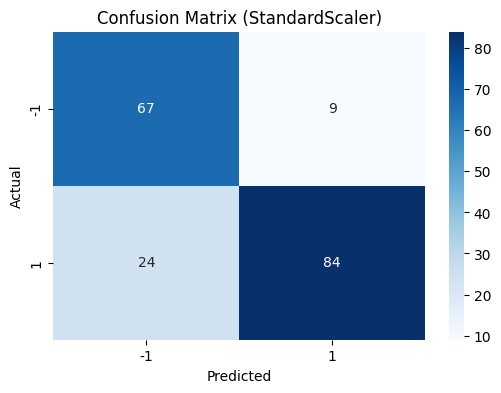


=== Using MinMaxScaler ===
Validation Accuracy: 0.8370
Validation F1-Score: 0.8529
Test Accuracy: 0.8207
Test F1-Score: 0.8358
Confusion Matrix:
[[67  9]
 [24 84]]


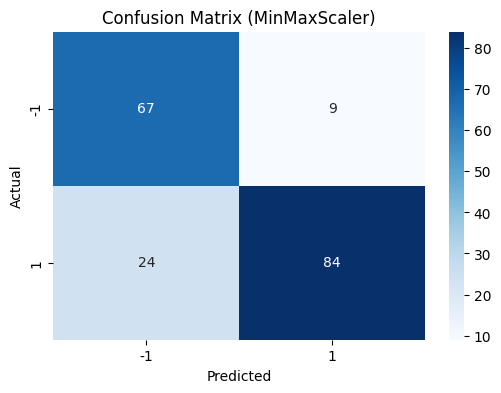


=== Using RobustScaler ===
Validation Accuracy: 0.8370
Validation F1-Score: 0.8529
Test Accuracy: 0.8207
Test F1-Score: 0.8358
Confusion Matrix:
[[67  9]
 [24 84]]


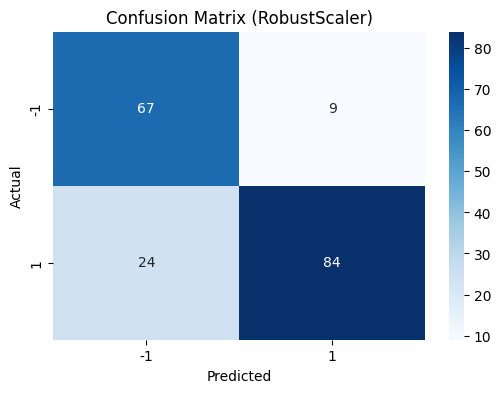

In [36]:

class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.alphas = []
        self.models = []
    
    def fit(self, X, Y):
        n_samples, n_features = X.shape
        w = np.ones(n_samples) / n_samples  # Initialize sample weights
        
        for _ in range(self.n_estimators):
            stump = DecisionTreeClassifier(max_depth=1)
            stump.fit(X, Y, sample_weight=w)
            y_pred = stump.predict(X)

            err = np.sum(w * (y_pred != Y)) / np.sum(w)  # Compute error
            alpha = 0.5 * np.log((1 - err) / (err + 1e-10))  # Model weight
            
            w *= np.exp(-alpha * Y * y_pred)  # Update sample weights
            w /= np.sum(w)  # Normalize
            
            self.models.append(stump)
            self.alphas.append(alpha)
    
    def predict(self, X):
        weak_preds = np.array([alpha * model.predict(X) for model, alpha in zip(self.models, self.alphas)])
        return np.sign(np.sum(weak_preds, axis=0))  # Aggregate predictions

# Define scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# Iterate over different scalers
for name, scaler in scalers.items():
    print(f"\n=== Using {name} ===")
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    # Train AdaBoost model
    model = AdaBoost(n_estimators=50)
    model.fit(X_train_scaled, y_train)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)
    
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Validation F1-Score: {val_f1:.4f}")
    
    # Final prediction on test set
    y_test_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test F1-Score: {test_f1:.4f}")
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[-1, 1], yticklabels=[-1, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix ({name})")
    plt.show()


# KNN

Scaler: StandardScaler | Best k: 7 | Best Metric: manhattan | F1 Score: 0.8699
Scaler: MinMaxScaler | Best k: 5 | Best Metric: manhattan | F1 Score: 0.8271
Scaler: RobustScaler | Best k: 3 | Best Metric: manhattan | F1 Score: 0.8198

Best Model Performance on Test Set:
Best Scaler: StandardScaler
Test Accuracy: 0.8623
Test F1 Score: 0.8632

Classification Report:
               precision    recall  f1-score   support

          -1       0.80      0.87      0.83        55
           1       0.91      0.86      0.88        83

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.87      0.86      0.86       138



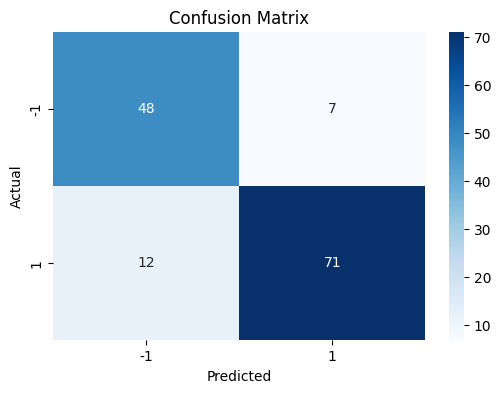

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define different scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# Define hyperparameter grid
param_grid = {
    "n_neighbors": [3, 5, 7, 11],  # Different values of k
    "metric": ["euclidean", "manhattan"]  # Distance metrics
}

best_model = None
best_f1 = 0
best_scaler_name = None

# Iterate over different scalers
for scaler_name, scaler in scalers.items():
    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # Hyperparameter tuning with GridSearchCV
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="f1_weighted", n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Evaluate on validation set
    best_knn = grid_search.best_estimator_
    y_val_pred = best_knn.predict(X_val_scaled)
    f1 = f1_score(y_val, y_val_pred, average="weighted")

    print(f"Scaler: {scaler_name} | Best k: {grid_search.best_params_['n_neighbors']} | Best Metric: {grid_search.best_params_['metric']} | F1 Score: {f1:.4f}")

    # Store the best model
    if f1 > best_f1:
        best_f1 = f1
        best_model = best_knn
        best_scaler_name = scaler_name
        best_scaler = scaler  # Save the best scaler

# Apply best scaler to test data
X_test_scaled = best_scaler.transform(X_test)

# Evaluate on test set
y_test_pred = best_model.predict(X_test_scaled)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average="weighted")  # Change to 'macro' or 'binary' as needed
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print final results
print("\nBest Model Performance on Test Set:")
print(f"Best Scaler: {best_scaler_name}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# LogisticRegression

Scaler: StandardScaler | Best C: 0.01 | F1 Score: 0.8557
Scaler: MinMaxScaler | Best C: 1 | F1 Score: 0.8630
Scaler: RobustScaler | Best C: 1 | F1 Score: 0.8628

Best Model Performance on Test Set:
Best Scaler: MinMaxScaler
Test Accuracy: 0.8696
Test F1 Score: 0.8707

Classification Report:
               precision    recall  f1-score   support

          -1       0.79      0.91      0.85        55
           1       0.93      0.84      0.89        83

    accuracy                           0.87       138
   macro avg       0.86      0.88      0.87       138
weighted avg       0.88      0.87      0.87       138



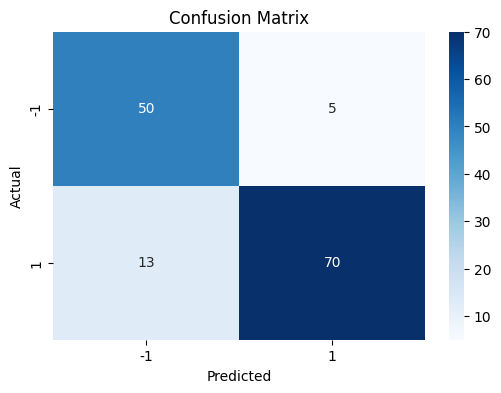

In [42]:
from sklearn.linear_model import LogisticRegression
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define different scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# Define hyperparameter grid for logistic regression
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100]}

best_model = None
best_f1 = 0
best_scaler_name = None

# Iterate over different scalers
for scaler_name, scaler in scalers.items():
    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Hyperparameter tuning with GridSearchCV
    grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring="f1_weighted", n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Evaluate on validation set
    best_log_reg = grid_search.best_estimator_
    y_val_pred = best_log_reg.predict(X_val_scaled)
    f1 = f1_score(y_val, y_val_pred, average="weighted")

    print(f"Scaler: {scaler_name} | Best C: {grid_search.best_params_['C']} | F1 Score: {f1:.4f}")

    # Store the best model
    if f1 > best_f1:
        best_f1 = f1
        best_model = best_log_reg
        best_scaler_name = scaler_name
        best_scaler = scaler  # Save the best scaler

# Apply best scaler to test data
X_test_scaled = best_scaler.transform(X_test)

# Evaluate on test set
y_test_pred = best_model.predict(X_test_scaled)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average="weighted")  # Change to 'macro' or 'binary' as needed
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print final results
print("\nBest Model Performance on Test Set:")
print(f"Best Scaler: {best_scaler_name}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# FNN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: StandardScaler | Hidden Layer: 16 | LR: 0.001 | Epochs: 50 | F1: 0.4468


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: StandardScaler | Hidden Layer: 16 | LR: 0.001 | Epochs: 100 | F1: 0.4391


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: StandardScaler | Hidden Layer: 16 | LR: 0.01 | Epochs: 50 | F1: 0.4301


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Scaler: StandardScaler | Hidden Layer: 16 | LR: 0.01 | Epochs: 100 | F1: 0.4160


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: StandardScaler | Hidden Layer: 32 | LR: 0.001 | Epochs: 50 | F1: 0.4468


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Scaler: StandardScaler | Hidden Layer: 32 | LR: 0.001 | Epochs: 100 | F1: 0.4413


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: StandardScaler | Hidden Layer: 32 | LR: 0.01 | Epochs: 50 | F1: 0.4447


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Scaler: StandardScaler | Hidden Layer: 32 | LR: 0.01 | Epochs: 100 | F1: 0.4099


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: MinMaxScaler | Hidden Layer: 16 | LR: 0.001 | Epochs: 50 | F1: 0.2826


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: MinMaxScaler | Hidden Layer: 16 | LR: 0.001 | Epochs: 100 | F1: 0.3144


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: MinMaxScaler | Hidden Layer: 16 | LR: 0.01 | Epochs: 50 | F1: 0.2483


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: MinMaxScaler | Hidden Layer: 16 | LR: 0.01 | Epochs: 100 | F1: 0.2571


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: MinMaxScaler | Hidden Layer: 32 | LR: 0.001 | Epochs: 50 | F1: 0.2826


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: MinMaxScaler | Hidden Layer: 32 | LR: 0.001 | Epochs: 100 | F1: 0.2988


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: MinMaxScaler | Hidden Layer: 32 | LR: 0.01 | Epochs: 50 | F1: 0.3067


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Scaler: MinMaxScaler | Hidden Layer: 32 | LR: 0.01 | Epochs: 100 | F1: 0.2743


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: RobustScaler | Hidden Layer: 16 | LR: 0.001 | Epochs: 50 | F1: 0.3818


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: RobustScaler | Hidden Layer: 16 | LR: 0.001 | Epochs: 100 | F1: 0.3881


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: RobustScaler | Hidden Layer: 16 | LR: 0.01 | Epochs: 50 | F1: 0.4127


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: RobustScaler | Hidden Layer: 16 | LR: 0.01 | Epochs: 100 | F1: 0.4006


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: RobustScaler | Hidden Layer: 32 | LR: 0.001 | Epochs: 50 | F1: 0.3913


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: RobustScaler | Hidden Layer: 32 | LR: 0.001 | Epochs: 100 | F1: 0.4067


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Scaler: RobustScaler | Hidden Layer: 32 | LR: 0.01 | Epochs: 50 | F1: 0.4067


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Scaler: RobustScaler | Hidden Layer: 32 | LR: 0.01 | Epochs: 100 | F1: 0.4067
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Best Model Performance on Test Set:
Best Scaler: StandardScaler
Best Hyperparameters: {'hidden_layer': 16, 'learning_rate': 0.001, 'epochs': 50}
Test Accuracy: 0.3478
Test F1 Score: 0.4408

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        55
           0       0.00      0.00      0.00         0
           1       1.00      0.58      0.73        83

    accuracy                           0.35       138
   macro avg       0.33      0.19      0.24       138
weighted avg       0.60      0.35      0.44       138



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

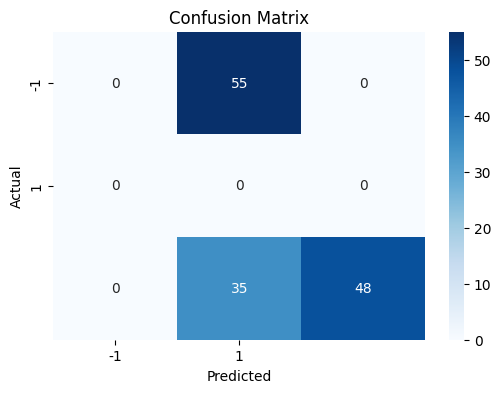

In [44]:


# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define different scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# Define hyperparameter options
hidden_layer_sizes = [16, 32]
learning_rates = [0.001, 0.01]
epochs_list = [50, 100]

best_model = None
best_f1 = 0
best_scaler_name = None
best_hparams = {}

# Iterate over different scalers
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Iterate over hyperparameter combinations
    for hidden_size in hidden_layer_sizes:
        for lr in learning_rates:
            for epochs in epochs_list:
                # Build neural network model
                model = keras.Sequential([
                    keras.layers.Dense(hidden_size, activation="relu", input_shape=(X_train_scaled.shape[1],)),
                    keras.layers.Dense(1, activation="sigmoid")
                ])

                # Compile the model
                model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                              loss="binary_crossentropy",
                              metrics=["accuracy"])

                # Train the model
                history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                                    epochs=epochs, batch_size=32, verbose=0)

                # Predict on validation set
                y_val_pred_probs = model.predict(X_val_scaled)
                y_val_pred = (y_val_pred_probs > 0.5).astype(int)

                # Compute F1-score
                f1 = f1_score(y_val, y_val_pred, average="weighted")

                print(f"Scaler: {scaler_name} | Hidden Layer: {hidden_size} | LR: {lr} | Epochs: {epochs} | F1: {f1:.4f}")

                # Store the best model
                if f1 > best_f1:
                    best_f1 = f1
                    best_model = model
                    best_scaler_name = scaler_name
                    best_scaler = scaler
                    best_hparams = {"hidden_layer": hidden_size, "learning_rate": lr, "epochs": epochs}

# Apply best scaler to test data
X_test_scaled = best_scaler.transform(X_test)

# Evaluate on test set
y_test_pred_probs = best_model.predict(X_test_scaled)
y_test_pred = (y_test_pred_probs > 0.5).astype(int)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average="weighted")
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print results
print("\nBest Model Performance on Test Set:")
print(f"Best Scaler: {best_scaler_name}")
print(f"Best Hyperparameters: {best_hparams}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
